In [1]:
import sys
import networkx as nx
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

## Introduction into Chemical Graph Theory

### What is graph?

A graph is is an ordered pair $G = (V,E)$: 

* set of $V$ of vertices or nodes 
* set $E \subseteq [V]^2$ of edges or lines. The elements of $E$ are therefore 2-element subsets of $V$, representing a relation between the two elements of $V$.

Terminology: <br> <br>
graph = network = web <br>
vertex = node = point = site = junction: $i = v_i$ <br>
edge = line = link = arc = tie: $(i,j) = e$

<a href="https://notebook.community/debsankha/network_course_python/talks/03-graph-theory">Source</a>

## Simple example: the house of the St Nicholas is a graph!

<img src="../images/stnicholas.jpg" alt="drawing" width="300"/>

<a href="https://blog.mangolanguages.com/5-awesome-traditions-to-celebrate-st.-nicholas-day">Source</a>

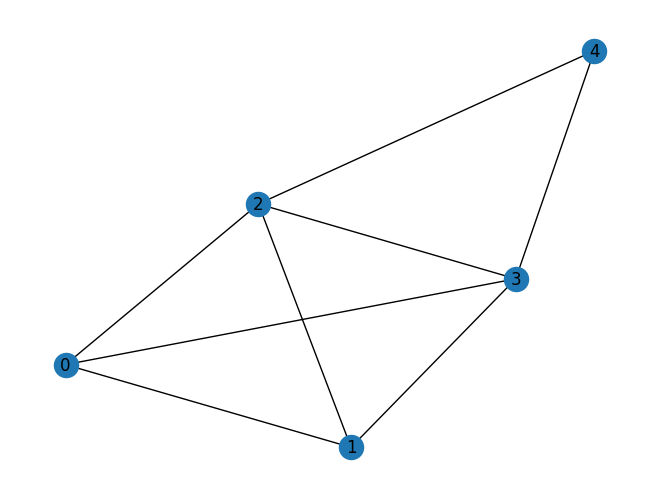

In [2]:
G = nx.Graph()

edges = [(0,1), (0,3), (1,3), (2,3), (0,2), (1,2), (2,4), (3,4)]

G.add_edges_from(edges)

pos = nx.spring_layout(G)

nx.draw(G, pos=pos, with_labels = True)

# What are examples of graphs in real life? What questions can be answered?

## Königsberger Problem

*  also known as the "Seven Bridges of Königsberg" problem:

    * origin of graph theory
    * named after the city of Königsberg in Prussia, which was divided by the Pregel River into four regions: the island of Kneiphof, the mainland regions of Lomse and Körten, and the suburb of Altstadt.
    
    * **Question: Is it possible to walk through the city in such a way that each of the seven bridges in the city is crossed exactly once?** <br>

<img src="../images/koenigsberger.png" alt="drawing" width="600"/>

<a href="https://mathigon.org/course/graph-theory/applications">Source</a>

## Tube Connections

* Tube Maps <br> <br>

    * How many stations are connected to a given station? (Degree of vertex)

    * What is the shortest route between two stations? (Dijkstra's algorithm for a unweighted graph)

    * How long does it take to travel from one station to another along a given route? (Dijkstra's algorithm for a weighted graph)

    * What is the maximum number of transfers required to get from one station to another?
    
    * What is the average distance between stations on the map?
    
<img src="../images/tube-map.png" alt="drawing" width="600"/>

<a href="https://mathigon.org/course/graph-theory/applications">Source</a>

## Other questions:

* How can we design an efficient network for distributing goods to multiple locations?

* How can we optimize the layout of a computer chip to minimize the distance between its components?

* How can we model the spread of a disease in a population and identify the most effective intervention strategies?

* How can we analyze the structure of a social network to identify influential individuals or communities?

* How can we determine the best way to connect a set of electrical components in a circuit to minimize power loss and maximize efficiency?

# Fundamental Properties of a Graph:

## Degree of a vertex:

The degree $d(v_i)$ of a vertex $v_i$ is the number of edges with which it is incident. 

DegreeView({0: 4, 3: 1, 4: 1, 5: 1, 1: 3, 2: 1, 6: 1})

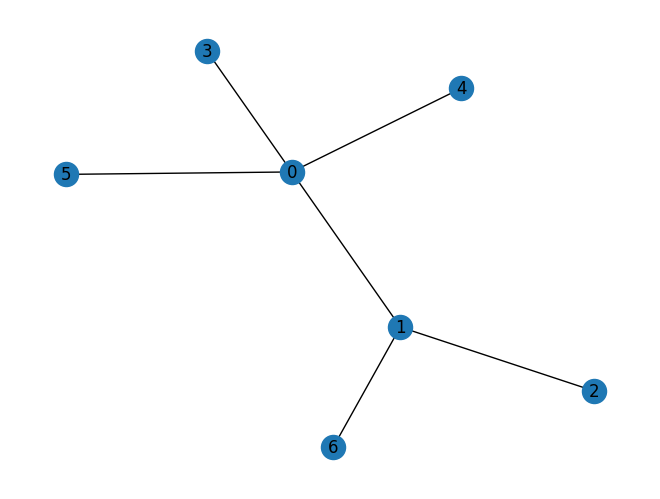

In [3]:
edges = [(0,3), (0,4), (0,5), (0, 1), (1,2), (1,6)]

G = nx.Graph()

G.add_edges_from(edges)

pos = nx.spring_layout(G)

nx.draw(G, pos=pos, with_labels = True)

G.degree

### Task

1. Write a function that returns a list of vertex degrees for each vertex in the following graph.

2. Can you figure out what this graph might represent?

In [4]:
edges = [(3, 2),
 (4, 3),
 (5, 3),
 (6, 4),
 (7, 5),
 (8, 0),
 (8, 6),
 (8, 7),
 (9, 1),
 (9, 2),
 (10, 9),
 (11, 4),
 (12, 5),
 (13, 2),
 (14, 6),
 (15, 7),
 (16, 10),
 (17, 10),
 (18, 10),
 (19, 0)]

In [5]:
#Your Code

def return_degrees(edges):

    n_atoms = len(set([vertex for edge in edges for vertex in edge]))

    cn_matrix = np.zeros((n_atoms, n_atoms))

    for edge in edges:

        i = edge[0]

        j = edge[1]

        cn_matrix[i,j] += 1

        cn_matrix[j,i] += 1

    degrees = cn_matrix.sum(axis=1, dtype=int)
    
    return degrees

return_degrees(edges)

array([2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1])

### Small example:

Predict VSEPR geometry based on the degree of an atom and the element symbol.

In [7]:
df = pd.read_pickle("../data/vsepr_prediction.pkl")

df.head()

atoms  \
0  [S, N, N, N, C, C, C, C, C, C, C, C, C, C, H, ...   
1  [N, N, C, C, C, C, C, C, C, C, C, C, C, C, C, ...   
2  [N, N, C, C, C, C, C, C, C, C, C, C, C, C, H, ...   
3  [N, N, N, N, N, N, C, C, C, C, C, C, C, C, C, ...   
4  [O, N, N, N, N, N, C, C, C, C, C, C, C, C, C, ...   

                                               edges  \
0  [(0, 8), (0, 11), (1, 4), (1, 5), (1, 10), (2,...   
1  [(0, 2), (0, 6), (0, 10), (1, 5), (1, 11), (1,...   
2  [(0, 6), (0, 7), (0, 19), (1, 5), (1, 10), (1,...   
3  [(0, 6), (0, 7), (0, 12), (1, 8), (1, 9), (1, ...   
4  [(0, 6), (0, 9), (1, 6), (1, 10), (1, 11), (2,...   

                                             classes  
0  [bent, trigonal_pyramidal, bent, trigonal_plan...  
1  [trigonal_pyramidal, trigonal_planar, tetrahed...  
2  [trigonal_planar, trigonal_pyramidal, trigonal...  
3  [t_shaped, t_shaped, t_shaped, bent, bent, ben...  
4  [bent, trigonal_planar, bent, bent, bent, trig...

In [8]:
data = []

for row in df.iterrows():

    edges = row[1]["edges"]

    atoms = row[1]["atoms"]

    classes = row[1]["classes"]

    #This is the place holder for your function.

    degrees = return_degrees(edges)

    for i, atom in enumerate(atoms):

        data.append([degrees[i], atom, classes[i]])

df = pd.DataFrame(data, columns=["degree", "element", "class"])

df.head()

degree element               class
0       2       S                bent
1       3       N  trigonal_pyramidal
2       2       N                bent
3       3       N     trigonal_planar
4       4       C         tetrahedral

In [9]:
df = pd.get_dummies(df, columns = ["element", "class"])

df.head()

degree  element_Br  element_C  element_Cl  element_F  element_H  element_I  \
0       2           0          0           0          0          0          0   
1       3           0          0           0          0          0          0   
2       2           0          0           0          0          0          0   
3       3           0          0           0          0          0          0   
4       4           0          1           0          0          0          0   

   element_N  element_O  element_P  element_S  element_Si  class_bent  \
0          0          0          0          1           0           1   
1          1          0          0          0           0           0   
2          1          0          0          0           0           1   
3          1          0          0          0           0           0   
4          0          0          0          0           0           0   

   class_epoxide  class_linear_cn1  class_linear_cn2  class_t_shaped  \
0              0                 0                 0               0   
1              0                 0                 0               0   
2              0                 0                 0               0   
3              0                 0                 0               0   
4              0                 0                 0               0   

   class_tetrahedral  class_trigonal_planar  class_trigonal_pyramidal  
0                  0                      0                         0  
1                  0                      0                         1  
2                  0                      0                         0  
3                  0                      1                         0  
4                  1                      0                         0

In [10]:
X = df[["degree"] +[column for column in df.columns if column.startswith("element")]].values

y = df[[column for column in df.columns if column.startswith("class")]].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

model = RandomForestClassifier(criterion="entropy", n_estimators=5)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

model.score(X_test,y_test)

0.9930497636919655

### Import graph properties:

* A graph can be **directed** (arrows indicating the direction of the connection between vertices) or undirected (no arrows indicating direction).

* A graph can be **weighted** (edges have assigned values) or unweighted (edges have no assigned values).

* A graph can be connected (there is a path between any two vertices) or disconnected (there is no path between some vertices).

* A graph can be a tree (a connected graph with no cycles) or non-tree (a graph with cycles or disconnected components).

* A graph can be bipartite (vertices can be divided into two disjoint sets such that no two vertices within the same set are connected) or non-bipartite (vertices cannot be divided into two disjoint sets such that no two vertices within the same set are connected).

* A graph can have **cycles** (closed paths that start and end at the same vertex) or be acyclic (no cycles present).

* The degree of a vertex is the number of edges incident to it.

* The degree sequence of a graph is the sequence of degrees of the vertices in the graph.

* The order of a graph is the number of vertices it has.

* The size of a graph is the number of edges it has.

* The density of a graph is a measure of how many edges it has relative to the maximum number of edges it could have.

* The diameter of a graph is the longest of the shortest paths between any two vertices.

* The girth of a graph is the length of the shortest cycle in the graph.

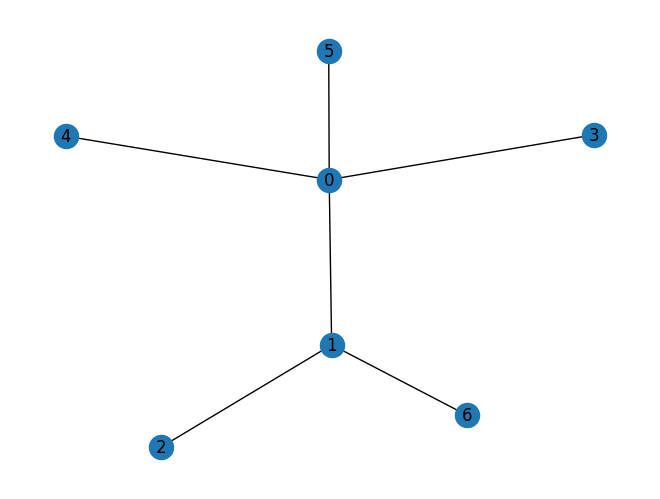

In [11]:
edges = [(0,3), (0,4), (0,5), (0, 1), (1,2)]

G = nx.Graph()

G.add_edges_from(edges)

G.add_edges_from([(1,6)], weight=2)

pos = nx.spring_layout(G)

nx.draw(G, pos=pos, with_labels = True)

# Structure Descriptor for Quantitative Modeling 

* Structural descriptors is the first important step in building models
that can predict properties of chemical compounds from their
structure. 

* This approach leads to quantitative structure-property relationship/quantitative structure-activity relationship.(QSPR/QSAR)

* The first topological index is the Wiener index W, also called path number. It is defined as the sum of the distances between any two atoms in the molecule. 

$W(G) = \sum_{i=1}^{N}\sum_{j>i}^{N} d_{ij} $

# What is the graph distance?

[[0, 1, 2, 1, 1, 1, 2],
 [1, 0, 1, 2, 2, 2, 1],
 [2, 1, 0, 3, 3, 3, 2],
 [1, 2, 3, 0, 2, 2, 3],
 [1, 2, 3, 2, 0, 2, 3],
 [1, 2, 3, 2, 2, 0, 3],
 [2, 1, 2, 3, 3, 3, 0]]

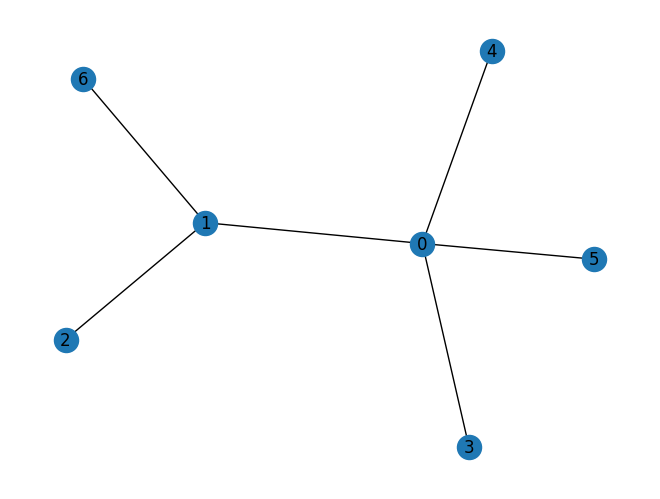

In [12]:
edges = [(0,3), (0,4), (0,5), (0, 1), (1,2), (1,6)]

G = nx.Graph()

G.add_edges_from(edges)

pos = nx.spring_layout(G)

nx.draw(G, pos=pos, with_labels = True)

distance_matrix = [[0,1,2,1,1,1,2], [1,0,1,2,2,2,1], [2,1,0,3,3,3,2], [1,2,3,0,2,2,3], [1,2,3,2,0,2,3],[1,2,3,2,2,0,3],[2,1,2,3,3,3,0]]

distance_matrix

### How to calculate graph distance? Dijkstra's algorithm

Now it's your turn to come up with a simple algorithm that calculates the distance from a starting vertex. 

Here some starting points:

1. What is the input? edges and source vertex.

2. Function should initialize two values at first:

    1. dist: array or dict of distances with dist(source) = 0, else dist($v_i$) = $\infty$

    2. Queue: list of nodes that has not been visited yet. List is empty in the end. 

The algorithm should run as follows:

<img src="images/dijkstra.png" alt="drawing" width="700"/>


### Task

1. Write the code for Dijkstra's algorithm.

2. Write a function to calculate the Wiener index and calculate the Wiener index for Paracetamol.

**If you need help:**

* you can ask your adjacent vertices or me. 

* open the first hint in dijkstra_hints/ (and the other hints if you still need help as well).

* Solutions for Dijkstra's algorithm and the Wiener index are provided in solutions/

In [13]:
#Graph for Paracetamol

edges = [(3, 2),
 (4, 3),
 (5, 3),
 (6, 4),
 (7, 5),
 (8, 0),
 (8, 6),
 (8, 7),
 (9, 1),
 (9, 2),
 (10, 9),
 (11, 4),
 (12, 5),
 (13, 2),
 (14, 6),
 (15, 7),
 (16, 10),
 (17, 10),
 (18, 10),
 (19, 0)]

In [14]:
#Your Dijkstra's code

def dijkstra_algorithm(edges, source):

    nodes = set([vertex for edge in edges for vertex in edge])

    n_atoms = len(set([vertex for edge in edges for vertex in edge]))

    cn_matrix = np.zeros((n_atoms, n_atoms))

    for edge in edges:

        i = edge[0]

        j = edge[1]

        cn_matrix[i,j] += 1

        cn_matrix[j,i] += 1

    
    #INIT
 
    distances = {v: sys.maxsize for v in range(n_atoms)}

    distances[source] = 0

    queue = list(nodes)

    #Loop

    while queue:

        filtered_distances = {v: d for v, d in distances.items() if v in queue}

        v = min(filtered_distances, key=filtered_distances.get)

        queue.remove(v)

        adjacent_vertices = np.argwhere(cn_matrix[v] == 1).flatten()

        for u in adjacent_vertices:

            dist_uv = distances[v] + 1

            if dist_uv < distances[u]:

                distances[u] = dist_uv

    return distances


In [15]:
#Your Wiener's code

def calc_wiener(edges):

    nodes = set([vertex for edge in edges for vertex in edge])

    n_atoms = len(set([vertex for edge in edges for vertex in edge]))

    W = 0

    for i in nodes:

        distances_for_i = dijkstra_algorithm(edges, i)

        for j in nodes:

            if j > i:

                W += distances_for_i[j]

    return W

calc_wiener(edges)

743

In [17]:
df = pd.read_pickle("../data/boiling_point.pkl")

data = []

for row in df.iterrows():

    smiles = row[1]["smiles"]

    edges = row[1]["edges"]

    boiling_point = row[1]["Tb_K"]

    #This is the place holder for your function.

    wiener = calc_wiener(edges)

    data.append([smiles, wiener, boiling_point])

dff = pd.DataFrame(data, columns=["smiles","wiener", "Tb_K"])

dff

smiles  wiener   Tb_K
0                              CC       1  184.0
1                             CCC       4  231.0
2                            CCCC      10  272.0
3                           CCCCC      20  309.0
4                          CCCCCC      35  342.0
5                        CCCCCCCC      84  398.0
6                      CCCCCCCCCC     165  447.0
7                     CCCCCCCCCCC     220  468.6
8                 CCCCCCCCCCCCCCC     560  543.6
9            CCCCCCCCCCCCCCCCCCCC    1330  616.0
10  CCCCCCCCCCCCCCCCCCCCCCCCCCCCC    4060  724.0

## How does the data look like?

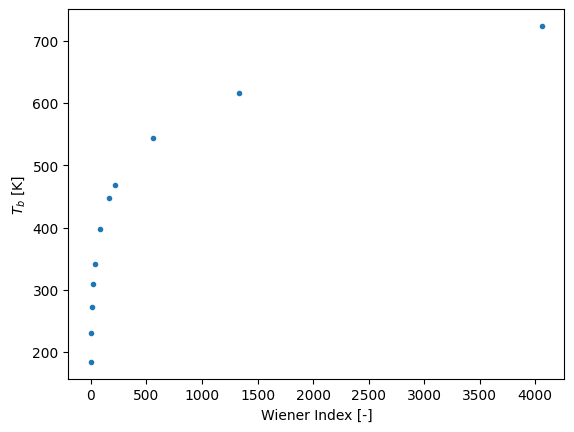

In [18]:
plt.xlabel("Wiener Index [-]")
plt.ylabel("$T_{b}$ [K]")
plt.plot(dff["wiener"], dff["Tb_K"], ".")
plt.show()

### Quantitative structure-property relationship (QSPR): 

Linear regression for predicition of boiling points of alkanes based on the Wiener index

Intercept: [141.25108334]
Coef: [[64.07177404]]
R2: 0.9817553919724095


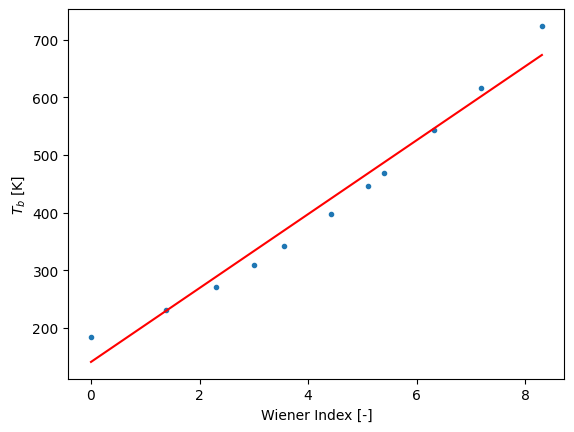

In [19]:
X = np.log(dff[["wiener"]].values)

Y = dff[["Tb_K"]].values

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0, test_size=0.25)

model = LinearRegression()
model.fit(X_train, y_train)

print(f"Intercept: {model.intercept_}")
print(f"Coef: {model.coef_}")

min_x = min(X.flatten())
max_x = max(X.flatten())

predicted = model.predict([[min_x], [max_x]])

y_test_pred = model.predict(X_test)
r2  = r2_score(y_test, y_test_pred)

print(f"R2: {r2}")

plt.plot(X, Y, ".")

plt.plot([min_x, max_x], predicted, color="red")
plt.xlabel("Wiener Index [-]")
plt.ylabel("$T_{b}$ [K]")

plt.show()